# Aula 2 de Aprendizado de Máquina e Reconhecimento de Padrões

Prof. Dr. Rodrigo Colnago Contreras

contreras@unifesp.br

Conteúdo:

* Introdução
* Modelos Probabilísticos de Regressão Linear Simples
* Conclusão

# Introdução à Regressão Linear

Muitas situações do dia a dia podem ser representadas por duas variáveis que possuem uma relação entre si — por exemplo, o tamanho de uma casa e o seu preço, ou o número de horas estudadas e a nota em uma prova.

Quando essa relação entre as variáveis segue um padrão mais ou menos constante, ou seja, quando **um aumento em uma variável tende a provocar um aumento (ou uma diminuição) proporcional na outra**, dizemos que existe uma **relação linear** entre elas.

Esse tipo de relação é estudado por um modelo chamado **Regressão Linear (RL)**, uma técnica estatística muito utilizada em diversas áreas, como economia, engenharia, ciências sociais e inteligência artificial.

Neste notebook, vamos explorar como construir modelos de Regressão Linear em Python, interpretar seus resultados e aplicá-los em exemplos reais.


## Modelo Probabilístico Linear Simples

Até agora, discutimos a ideia de associar duas variáveis $X$ e $Y$ por meio de uma relação linear do tipo:

$$
Y = \beta_0 + \beta_1 X
$$

Essa expressão é uma **forma determinística**, isto é, não leva em consideração a aleatoriedade natural dos dados do mundo real.

Para que esse modelo possa ser usado em contextos reais — onde há **variações, incertezas e ruídos** —, generalizamos essa associação por meio de um modelo **probabilístico**, também conhecido como **modelo probabilístico linear simples**.

### Definição

No modelo probabilístico linear simples, consideramos que:

$$
Y = \beta_0 + \beta_1 X + \varepsilon
$$

Onde:

- $ \beta_0 $ e $ \beta_1 $ são **parâmetros reais** do modelo;
- $ \varepsilon $ é um **termo de erro aleatório**, também chamado de **ruído**, que representa todas as outras influências sobre $ Y $ que não estão sendo modeladas por $ X$;
- Assumimos que $ \varepsilon \sim \mathcal{N}(0, \sigma^2) $, ou seja, segue uma distribuição normal com média zero e variância constante $ \sigma^2 $.

### 🎯 Interpretação

Fixando um valor $x_0$ da variável $X$, o valor de $ Y $ correspondente é:

$$
Y = \beta_0 + \beta_1 x_0 + \varepsilon
$$

Note que **como $x_0$ está fixado**, a única **fonte de variabilidade** em $Y$ é o termo aleatório $\varepsilon$. Isso significa que a incerteza na previsão de $Y$ não vem de $X$, mas do ruído associado à relação entre $X$ e $Y$.

Assim, o modelo nos diz que **a variável aleatória $Y$**, dada uma entrada fixa $x_0$, segue uma distribuição normal com média $\beta_0 + \beta_1 x_0$ e variância $\sigma^2$:

$$
Y \mid X = x_0 \sim \mathcal{N}(\beta_0 + \beta_1 x_0, \sigma^2).
$$

**Obs.**: O fato acima pode ser demonstrado matematicamente ao analisar $\mathbb{E}(Y|x_0)$ e $\text{Var}(Y|x_0)$.




---


Com base no modelo:

$$
Y = \beta_0 + \beta_1 X + \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, \sigma^2)
$$

podemos destacar dois pontos fundamentais:

1. **O valor esperado de $Y$ dado um valor $x_0$** é:

$$
\mathbb{E}[Y \mid X = x_0] = \beta_0 + \beta_1 x_0
$$

Ou seja, a média da distribuição de $Y$ é exatamente o valor que a reta prediz.

2. **A variância de $Y$** **não depende de $x$**, mas apenas da variância do erro $$\varepsilon$$:

$$
\text{Var}(Y \mid X = x_0) = \sigma^2
$$

Isso significa que, embora a média de $Y$ varie linearmente com $X$, a **dispersão ao redor da reta é constante**.

Vamos visualizar isso agora! 👇


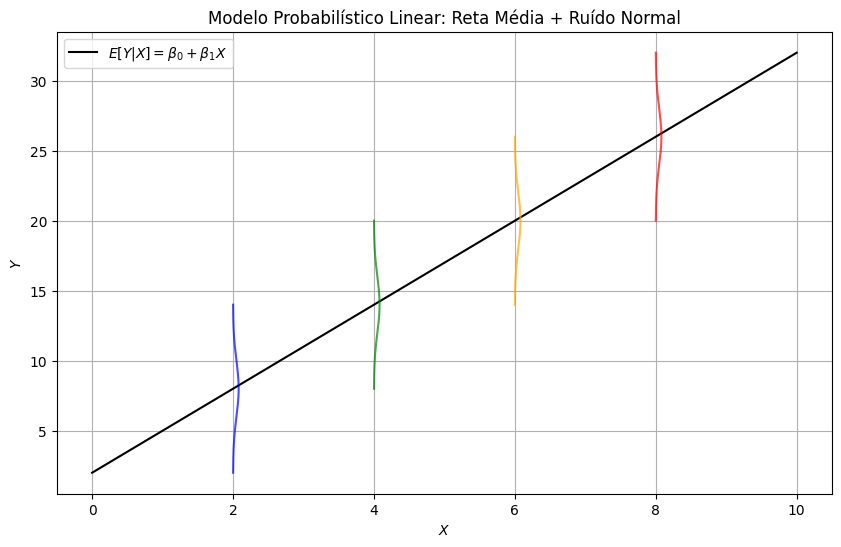

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parâmetros do modelo
beta_0 = 2
beta_1 = 3
sigma = 2

# Intervalo de X
x_vals = np.linspace(0, 10, 100)
y_mean = beta_0 + beta_1 * x_vals

# Pontos selecionados para mostrar as distribuições
x_points = [2, 4, 6, 8]
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))

# Reta média
plt.plot(x_vals, y_mean, label=r'$E[Y|X] = \beta_0 + \beta_1 X$', color='black')

# Distribuições normais ao longo da reta
for x0, c in zip(x_points, colors):
    mu = beta_0 + beta_1 * x0
    y = np.linspace(mu - 3*sigma, mu + 3*sigma, 300)
    pdf = norm.pdf(y, mu, sigma)
    plt.plot([x0 + pdf_val * 0.4 for pdf_val in pdf], y, color=c, alpha=0.7)

# Anotações
plt.title('Modelo Probabilístico Linear: Reta Média + Ruído Normal')
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.grid(True)
plt.legend()
plt.show()


**Obs.:** No gráfico que representa o modelo probabilístico linear, as distribuições normais são desenhadas ao longo da reta média para ilustrar a variabilidade do erro aleatório em cada ponto de $X$. Para isso, as curvas de densidade da distribuição normal são traçadas lateralmente, posicionadas em torno dos valores $x_0$. Como a função densidade normal retorna valores no eixo vertical (alturas), é necessário aplicar um fator de escala para transformar essas alturas em deslocamentos horizontais, permitindo que a curva seja visualizada ao lado da reta. No código, esse efeito é obtido multiplicando a densidade por um valor arbitrário (por exemplo, 0.4), o que determina o “alargamento” da curva no eixo $X$. Esse fator não afeta a interpretação estatística da variância, mas apenas torna o gráfico mais intuitivo ao mostrar, visualmente, que a incerteza associada a $Y$ provém da distribuição do erro, com média zero e variância constante $\sigma^2$.

### Definindo os Erros em um Modelo Probabilístico de Regressão Linear

Considere um experimento no qual observamos $n$ pares de valores $(X_i, Y_i)$, com $i = 1, 2, ..., n$, correspondendo a amostras de duas **variáveis aleatórias pareadas** $X$ e $Y$. Suponhamos que exista uma relação aproximadamente linear entre elas, mas com certa variabilidade aleatória em torno dessa tendência.

Formalizamos essa ideia com o **modelo probabilístico linear simples**:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$

onde:
- $\beta_0$ e $\beta_1$ são os **parâmetros desconhecidos** do modelo;
- $\varepsilon_i$ representa o **termo de erro aleatório** associado à $i$-ésima observação;
- Assume-se que $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$ e que os erros são **independentes e identicamente distribuídos (i.i.d.)**.

Ao ajustarmos um modelo de regressão linear sobre os dados amostrais, obtemos uma reta estimada:

$$
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i
$$

A diferença entre o valor observado $Y_i$ e o valor ajustado $\hat{Y}_i$ é chamada de **erro amostral** ou **resíduo**, denotado por:

$$
\varepsilon_i = Y_i - \hat{Y}_i
$$

Esses resíduos capturam a **parte do comportamento de $Y$ que não foi explicada pela reta ajustada**, ou seja, o desvio entre o que foi observado e o que o modelo previu. Em uma regressão bem ajustada, esperamos que os resíduos sejam **pequenos, centrados em zero e sem padrão sistemático**.

Visualizar esses erros graficamente é uma etapa fundamental da análise, pois fornece intuição sobre a qualidade do ajuste do modelo, a presença de *outliers* ou padrões não lineares que não foram capturados pela regressão.


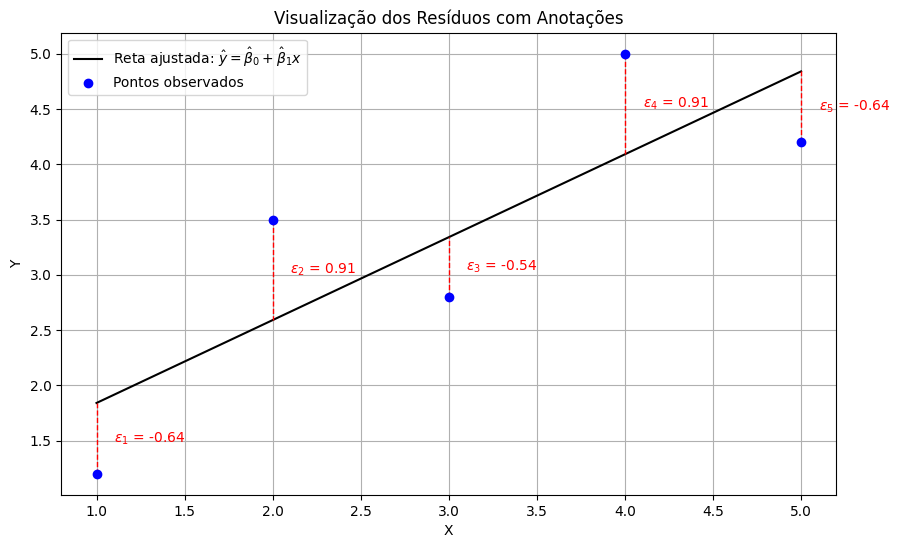

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados com mais variação para evidenciar os erros
X = np.array([1, 2, 3, 4, 5])
y = np.array([1.2, 3.5, 2.8, 5.0, 4.2])  # valores "tortos" de propósito

# Ajuste do modelo
X_reshape = X.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X_reshape, y)
y_pred = modelo.predict(X_reshape)

# Gráfico
plt.figure(figsize=(10, 6))

# Reta ajustada
plt.plot(X, y_pred, label=r'Reta ajustada: $\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$', color='black')

# Pontos observados
plt.scatter(X, y, label='Pontos observados', color='blue', zorder=5)

# Resíduos e anotações
for i in range(len(X)):
    # linha do erro
    plt.plot([X[i], X[i]], [y[i], y_pred[i]], color='red', linestyle='--', linewidth=1)

    # valor do erro (com 2 casas decimais)
    erro = y[i] - y_pred[i]
    plt.text(X[i] + 0.1, (y[i] + y_pred[i]) / 2, f"$\\varepsilon_{i+1}$ = {erro:.2f}",
             fontsize=10, color='red', verticalalignment='center')

# Título e eixos
plt.title('Visualização dos Resíduos com Anotações')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()


### Estimando os Parâmetros com o Método dos Mínimos Quadrados

Destaca-se que, até então, os parâmetros $(\beta_0,\beta_1)\in\mathbb{R}^2$ foram tomados genericamente. Entretanto, o intuito ao definir a associação de $Y$ por um modelo linear $\beta_0 + \beta_1 X + \varepsilon$ consiste em minimizar o valor do erro $\varepsilon$ cometido nesta associação. Isso pode ser feito de várias formas. Matematicamente, suponham-se $X$ e $Y$ duas VAs observadas por $n$ elementos pareados $(X_i,Y_i)_{i=1}^n$ e que seja dado o modelo probabilístico linear:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$

nosso objetivo é encontrar os valores de $\beta_0$ e $\beta_1$ que melhor ajustam os dados. Para isso, usamos o **método dos mínimos quadrados**, que consiste em minimizar a **soma dos quadrados dos erros** (também chamados de resíduos):

$$
S(\beta_0, \beta_1) := \sum_{i=1}^n \varepsilon_i^2 = \sum_{i=1}^n \left(Y_i - (\beta_0 + \beta_1 X_i)\right)^2 = \sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)^2
$$

Queremos encontrar os valores $\hat{\beta}_0$ e $\hat{\beta}_1$ que minimizam essa função.

### Derivando a função de erro

Para minimizar $S(\beta_0, \beta_1)$, tomamos as derivadas parciais com relação a $\beta_0$ e $\beta_1$ e igualamos a zero ($\nabla S = \vec{0}$):

#### Derivada parcial em relação a $\beta_0$:

$$
\frac{\partial S}{\partial \beta_0} = -2 \sum_{i=1}^n (Y_i - \beta_0 - \beta_1 X_i)
$$

#### Derivada parcial em relação a $\beta_1$:

$$
\frac{\partial S}{\partial \beta_1} = -2 \sum_{i=1}^n X_i (Y_i - \beta_0 - \beta_1 X_i)
$$

Igualando ambas a zero, obtemos o sistema de equações normais:

$$
\begin{cases}
\sum (Y_i - \beta_0 - \beta_1 X_i) = 0 \\
\sum X_i (Y_i - \beta_0 - \beta_1 X_i) = 0
\end{cases}
$$

Assim,

$$
\begin{cases}
\sum Y_i = n \beta_0 + \beta_1 \sum X_i \quad \text{(equação 1)} \\
\sum X_i Y_i = \beta_0 \sum X_i + \beta_1 \sum X_i^2 \quad \text{(equação 2)}
\end{cases}
$$

Esse é um sistema linear com **duas equações e duas incógnitas**, que podem ser escritas de forma matricial:

$$
\begin{bmatrix}
n & \sum X_i \\
\sum X_i & \sum X_i^2
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}
=
\begin{bmatrix}
\sum Y_i \\
\sum X_i Y_i
\end{bmatrix}
$$

Esse sistema admite **solução única** desde que a matriz dos coeficientes seja invertível, o que ocorre sempre que **os valores de $X_i$ não forem todos iguais** (ou seja, desde que haja **pelo menos dois valores distintos de $X$** na amostra).

### Intuição

- A **primeira equação** representa a soma dos resíduos totais igual a zero — é o equilíbrio vertical da reta.
- A **segunda equação** representa o fato de que os resíduos não estão correlacionados com os valores de $X$ — é o equilíbrio da inclinação.

### Resolvendo simbolicamente

Podemos resolver esse sistema pelas fórmulas conhecidas para sistemas 2×2, ou substituir os resultados esperados pela média amostral:

A partir da equação 1:

$$
\sum Y_i = n \beta_0 + \beta_1 \sum X_i \Rightarrow \bar{Y} = \beta_0 + \beta_1 \bar{X}
$$

Isolando $\beta_0$:

$$
\beta_0 = \bar{Y} - \beta_1 \bar{X}
$$

Substituímos esse valor na equação 2, obtem-se a partir de certa manipulação algébrica que:

$$
\hat{\beta}_1 = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sum (X_i - \bar{X})^2}
$$

E, finalmente:

$$
\hat{\beta}_0 = \bar{Y} - \hat{\beta}_1 \bar{X}
$$

---

Com isso, obtemos os **estimadores dos mínimos quadrados**, os quais existem e são únicos sempre que houver **variação em $X$**. Isso equivale a exigir que os pares $(X_i, Y_i)$ **não estejam todos alinhados verticalmente**, o que é garantido sempre que houver **pelo menos dois valores distintos de $X$**.

O sistema linear:

$$
A \cdot \beta = b
$$

com:

$$
A =
\begin{bmatrix}
n & \sum X_i \\
\sum X_i & \sum X_i^2
\end{bmatrix}, \quad
\beta =
\begin{bmatrix}
\beta_0 \\
\beta_1
\end{bmatrix}, \quad
b =
\begin{bmatrix}
\sum Y_i \\
\sum X_i Y_i
\end{bmatrix}
$$

tem solução única se o **determinante de $A$ for diferente de zero**, o que ocorre sempre que não houver colinearidade total nos dados.

Essa é a base algébrica do ajuste de uma regressão linear simples.


### **Exercício** (Resolvido): Ajuste de um Modelo Probabilístico de Regressão Linear (MPRL)

Considere o conjunto de dados abaixo, com $n = 5$ observações:

| $i$ | $X_i$ | $Y_i$ |
|-----|-------|-------|
| 1   | 1.0   | 2.2   |
| 2   | 2.0   | 2.8   |
| 3   | 3.0   | 3.7   |
| 4   | 4.0   | 4.5   |
| 5   | 5.0   | 5.1   |

Esses dados representam uma amostra de duas variáveis aleatórias pareadas $(X_i, Y_i)$, nas quais se acredita existir uma relação linear com ruído aleatório.

### Tarefa

Construa e resolva manualmente o sistema de equações normais para encontrar os estimadores dos parâmetros do **modelo probabilístico de regressão linear simples (MPRL)** da forma:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$

#### Passo 1: Calcule as somas necessárias

- $\sum X_i$
- $\sum Y_i$
- $\sum X_i^2$
- $\sum X_i Y_i$

#### Passo 2: Escreva o sistema de equações normais

O sistema tem a forma:

$$
\begin{cases}
\sum Y_i = n \cdot \beta_0 + \beta_1 \cdot \sum X_i \\
\sum X_i Y_i = \beta_0 \cdot \sum X_i + \beta_1 \cdot \sum X_i^2
\end{cases}
$$

Substitua os valores numéricos obtidos nas somas acima e escreva o sistema com os coeficientes explícitos.

#### Passo 3: Resolva o sistema

Use substituição, escalonamento ou qualquer método de álgebra linear para encontrar os valores de:

- $\hat{\beta}_1$ (inclinação da reta)
- $\hat{\beta}_0$ (intercepto)

#### Passo 4: Escreva o modelo estimado

Dê a expressão final do modelo estimado:

$$
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i
$$

### **Solução:**

In [ ]:
import numpy as np

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 2.8, 3.7, 4.5, 5.1])

# Somatórios
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_x2 = np.sum(X**2)
sum_xy = np.sum(X * Y)

# Sistema linear
A = np.array([[n,     sum_x],
              [sum_x, sum_x2]])
b = np.array([sum_y, sum_xy])

# Resolvendo
beta = np.linalg.solve(A, b)
print(f"β_0 = {beta[0]:.4f}")
print(f"β_1 = {beta[1]:.4f}")


β_0 = 1.4100
β_1 = 0.7500


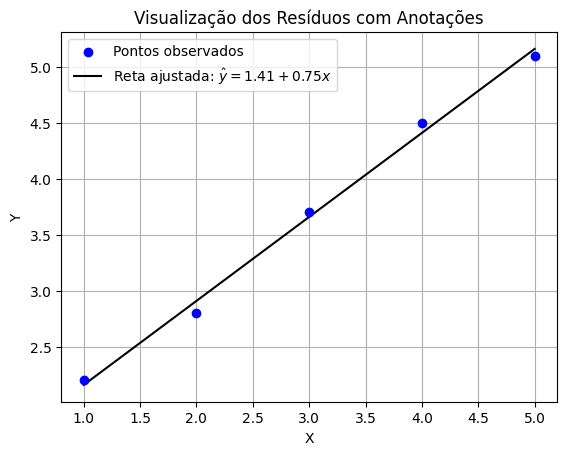

In [ ]:
plt.scatter(X, Y, label='Pontos observados', color='blue', zorder=5)
plt.plot(X, beta[0] + beta[1] * X, label=r'Reta ajustada: $\hat{y} = '+str(round(beta[0],4))+' + '+str(round(beta[1],4))+' x$', color='black')
plt.title('Visualização dos Resíduos com Anotações')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

### **Exercício** (Resolvido) 2: Regressão Linear com Fraca Associação

Dados os $n = 100$ pares de variáveis aleatórias $(X_i, Y_i)$ gerados com o código abaixo, suponha que exista uma associação linear entre as VAs e monte o MPRL na forma:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i.
$$

O que é possível notar matematicamente (reta $\hat{y}$ e seu coeficiente angular) acerca do erro dessa associação?


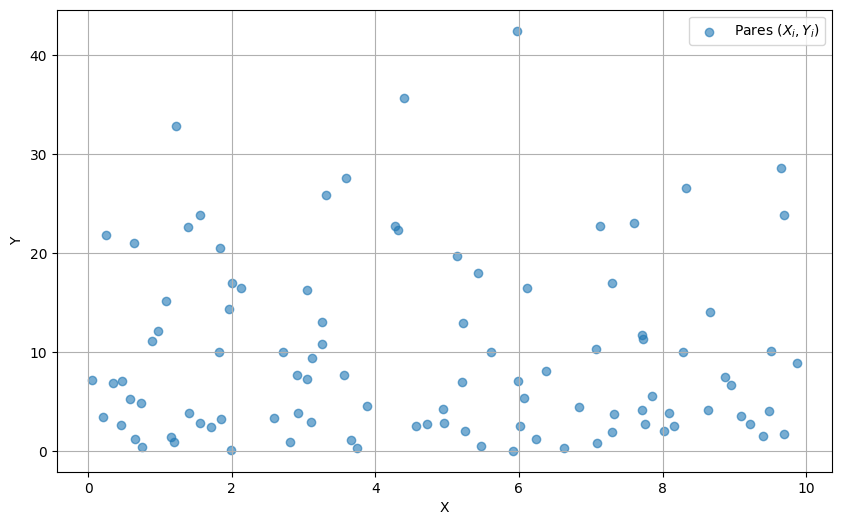

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Geração dos dados
np.random.seed(42)
n = 100
X = np.random.uniform(0, 10, size=n)
Y = np.random.exponential(scale=10.0, size=n)

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.6, label='Pares $(X_i,Y_i)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend()
plt.show()


### **Solução:**

In [ ]:
import numpy as np

# Somatórios
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_x2 = np.sum(X**2)
sum_xy = np.sum(X * Y)

# Sistema linear
A = np.array([[n,     sum_x],
              [sum_x, sum_x2]])
b = np.array([sum_y, sum_xy])

# Resolvendo
beta = np.linalg.solve(A, b)
print(f"β_0 = {beta[0]:.4f}")
print(f"β_1 = {beta[1]:.4f}")


β_0 = 10.1749
β_1 = -0.0878


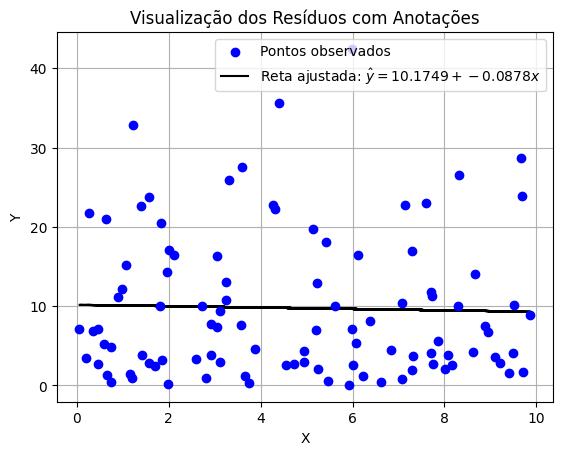

In [ ]:
plt.scatter(X, Y, label='Pontos observados', color='blue', zorder=5)
plt.plot(X, beta[0] + beta[1] * X, label=r'Reta ajustada: $\hat{y} = '+str(round(beta[0],4))+' + '+str(round(beta[1],4))+' x$', color='black')
plt.title('Visualização dos Resíduos com Anotações')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## **Teste de Utilidade do Modelo**: Significância de $\beta_1$

Após ajustar um modelo de regressão linear, queremos saber **se a variável explicativa $X$ realmente ajuda a explicar $Y$**. Para isso, aplicamos o **teste de hipótese sobre o parâmetro $\beta_1$**, conhecido como **teste de utilidade do modelo**.

###  Hipóteses do Teste

- **Hipótese nula ($H_0$):** $\beta_1 = 0$  
  (não há efeito linear de $X$ sobre $Y$)

- **Hipótese alternativa ($H_1$):** $\beta_1 \ne 0$  
  (existe efeito linear)

---

###  Estatística do Teste

A estatística de teste utilizada é um valor-$t$, dado por:

$$
t = \frac{\hat{\beta}_1}{\text{EP}(\hat{\beta}_1)}
$$

Onde $\text{EP}(\hat{\beta}_1)$ é o **erro padrão** da estimativa de $\hat{\beta}_1$, calculado por:

$$
\text{EP}(\hat{\beta}_1) = \sqrt{ \frac{\hat{\sigma}^2}{\sum (X_i - \bar{X})^2} }
$$

E $\hat{\sigma}^2$ é a estimativa da variância residual:

$$
\hat{\sigma}^2 = \frac{1}{n-2} \sum (Y_i - \hat{Y}_i)^2
$$

---

### Interpretação

A estatística $t$ segue aproximadamente uma **distribuição t de Student com $n-2$ graus de liberdade**. Com isso, podemos:

- **Calcular o valor-$p$** correspondente ao $t$ observado;
- **Comparar com um nível de significância** (ex: $\alpha = 0{,}05$);
- **Rejeitar ou não $H_0$**.

---

### Conclusão

- Se o valor-$p$ for **baixo** (menor que $\alpha$), **rejeitamos $H_0$**, concluindo que **$\beta_1 \ne 0$** com evidência estatística.
- Se o valor-$p$ for **alto**, **não rejeitamos $H_0$**, e não podemos afirmar que $X$ influencia $Y$ de forma significativa no modelo linear.

---

### 📌 Observação

Este teste é **central para avaliar a utilidade preditiva do modelo**. Afinal, se $\beta_1$ não for significativamente diferente de zero, então $X$ não tem poder explicativo sobre $Y$ e o modelo linear não é útil para essa relação.




---

### **Exercício** (Resolvido) 3: Teste de Utilidade do Modelo de Regressão Linear

Implemente uma função que **testa a utilidade de um modelo de regressão linear simples**, ou seja, verifica se há evidência estatística de que a variável explicativa $X$ contribui para explicar a variável resposta $Y$.

### Objetivo

Você deve escrever uma função em Python que receba duas amostras $X$ e $Y$ e conduza o **teste de hipótese para o coeficiente angular $\beta_1$** no modelo:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$

### Hipóteses do Teste

Queremos testar:

- $H_0$: $\beta_1 = 0$ (não há relação linear entre $X$ e $Y$)
- $H_1$: $\beta_1 \ne 0$ (existe relação linear)

Esse é um **teste bicaudal**, e a estatística de teste é:

$$
t = \frac{\hat{\beta}_1}{\text{EP}(\hat{\beta}_1)}
$$

A estatística $t$ segue uma **distribuição t de Student com $n - 2$ graus de liberdade**. Para calcular o valor-p no Python, use:

```python
from scipy import stats

# Valor absoluto de t observado
t_obs = ...

# Cálculo do valor-p bicaudal:
p_value = 2 * stats.t.sf(np.abs(t_obs), df=n - 2)


In [ ]:
import numpy as np
from scipy import stats

def teste_utilidade_regressao(X, Y, alpha=0.05):
    n = len(X)
    X = np.asarray(X)
    Y = np.asarray(Y)

    # Somatórios
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_x2 = np.sum(X**2)
    sum_xy = np.sum(X * Y)

    # Sistema normal: A * [beta_0, beta_1] = b
    A = np.array([[n, sum_x],
                  [sum_x, sum_x2]])
    b = np.array([sum_y, sum_xy])

    beta_0, beta_1 = np.linalg.solve(A, b)

    # Previsões
    Y_hat = beta_0 + beta_1 * X

    # Variância residual
    sigma2_hat = np.sum((Y - Y_hat)**2) / (n - 2)

    # Erro padrão de beta_1
    Sxx = np.sum((X - np.mean(X))**2)
    EP_beta_1 = np.sqrt(sigma2_hat / Sxx)

    # Estatística t
    t_stat = beta_1 / EP_beta_1

    # Valor-p bicaudal
    p_value = 2 * stats.t.sf(np.abs(t_stat), df=n - 2)

    print(f"β̂₀ = {beta_0:.4f}")
    print(f"β̂₁ = {beta_1:.4f}")
    print(f"Erro padrão de β̂₁: {EP_beta_1:.4f}")
    print(f"t = {t_stat:.4f}")
    print(f"Valor-p = {p_value:.4f}")

    if p_value < alpha:
        print(f"\n✅ Existe evidência estatística para afirmar que β₁ ≠ 0 (nível α = {alpha})")
        print("➡️ A regressão linear é útil neste caso.")
    else:
        print(f"\n❌ Não há evidência estatística suficiente para rejeitar H₀ (β₁ = 0)")
        print("➡️ A regressão linear não é recomendada neste caso.")

    return beta_0, beta_1, EP_beta_1, t_stat, p_value


In [ ]:
beta_0, beta_1, EP_beta_1, t_stat, p_value = teste_utilidade_regressao(X, Y)

β̂₀ = 10.1749
β̂₁ = -0.0878
Erro padrão de β̂₁: 0.3082
t = -0.2848
Valor-p = 0.7764

❌ Não há evidência estatística suficiente para rejeitar H₀ (β₁ = 0)
➡️ A regressão linear não é recomendada neste caso.


In [ ]:
from IPython.display import display, Markdown

display(Markdown(f"""
No exercício, foi conduzido um teste de hipótese para verificar a utilidade do modelo de regressão linear simples entre as variáveis $X$ e $Y$. O objetivo foi testar se o coeficiente angular $\\beta_1$ é significativamente diferente de zero, isto é, se há evidência estatística de uma relação linear entre as variáveis. Foram consideradas as hipóteses $H_0: \\beta_1 = 0$ (sem relação linear) e $H_1: \\beta_1 \\ne 0$ (relação linear presente), utilizando o teste $t$ bicaudal com $n - 2$ graus de liberdade. O estimador obtido foi $\\hat{{\\beta}}_1 = {beta_1:.4f}$ com erro padrão de {EP_beta_1:.4f}, resultando em uma estatística $t = {t_stat:.4f}$. O valor-$p$ associado foi de {p_value:.4f}, superior ao nível de significância de 5%. Dessa forma, não rejeitamos a hipótese nula, o que indica que não há evidência estatística suficiente para afirmar que $X$ influencia $Y$ de forma linear. Assim, conclui-se que a regressão linear não é recomendada para esse conjunto de dados.
"""))



No exercício, foi conduzido um teste de hipótese para verificar a utilidade do modelo de regressão linear simples entre as variáveis $X$ e $Y$. O objetivo foi testar se o coeficiente angular $\beta_1$ é significativamente diferente de zero, isto é, se há evidência estatística de uma relação linear entre as variáveis. Foram consideradas as hipóteses $H_0: \beta_1 = 0$ (sem relação linear) e $H_1: \beta_1 \ne 0$ (relação linear presente), utilizando o teste $t$ bicaudal com $n - 2$ graus de liberdade. O estimador obtido foi $\hat{\beta}_1 = -0.0878$ com erro padrão de 0.3082, resultando em uma estatística $t = -0.2848$. O valor-$p$ associado foi de 0.7764, superior ao nível de significância de 5%. Dessa forma, não rejeitamos a hipótese nula, o que indica que não há evidência estatística suficiente para afirmar que $X$ influencia $Y$ de forma linear. Assim, conclui-se que a regressão linear não é recomendada para esse conjunto de dados.


##  Estimativa da Variância do Erro no Modelo Probabilístico Linear

No modelo probabilístico linear simples:

$$
Y_i = \beta_0 + \beta_1 X_i + \varepsilon_i, \quad \varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

a variância $\sigma^2$ está associada à distribuição do termo de erro $\varepsilon_i$. Essa variância representa a **dispersão esperada dos pontos $(X_i, Y_i)$ em torno da reta verdadeira** $Y = \beta_0 + \beta_1 X$. Quanto **menor** for o valor de $\sigma^2$, mais **concentrados na reta** os pares observados tendem a estar. Por outro lado, quanto **maior** for $\sigma^2$, mais **espalhados e distantes** da reta os pontos se encontram.

Essa diferença é ilustrada na figura a seguir, que mostra dois conjuntos de dados gerados com a mesma reta, mas com diferentes níveis de ruído.


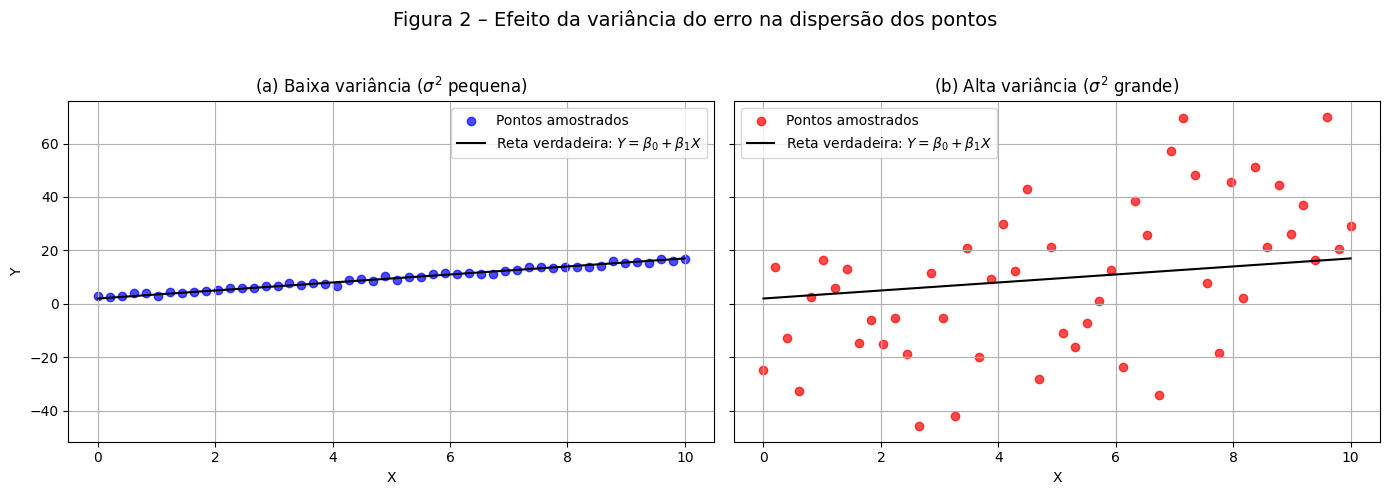

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do modelo
np.random.seed(0)
n = 50
X = np.linspace(0, 10, n)
beta_0 = 2
beta_1 = 1.5

# Casos: ruído pequeno e grande
epsilon_baixo = np.random.normal(0, 0.5, size=n)
epsilon_alto  = np.random.normal(0, 30.0, size=n)

Y_baixo = beta_0 + beta_1 * X + epsilon_baixo
Y_alto  = beta_0 + beta_1 * X + epsilon_alto

# Previsões reais (reta do modelo)
Y_true = beta_0 + beta_1 * X

# Gráfico
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Subfigura (a): baixa variância
axs[0].scatter(X, Y_baixo, color='blue', alpha=0.7, label='Pontos amostrados')
axs[0].plot(X, Y_true, color='black', label=r'Reta verdadeira: $Y = \beta_0 + \beta_1 X$')
axs[0].set_title('(a) Baixa variância ($\sigma^2$ pequena)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)
axs[0].legend()

# Subfigura (b): alta variância
axs[1].scatter(X, Y_alto, color='red', alpha=0.7, label='Pontos amostrados')
axs[1].plot(X, Y_true, color='black', label=r'Reta verdadeira: $Y = \beta_0 + \beta_1 X$')
axs[1].set_title('(b) Alta variância ($\sigma^2$ grande)')
axs[1].set_xlabel('X')
axs[1].grid(True)
axs[1].legend()

plt.suptitle('Figura 2 – Efeito da variância do erro na dispersão dos pontos', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## 📏 Estimativa da Variância do Erro: SQE e $\hat{\sigma}^2$

Embora o modelo probabilístico de regressão linear assuma que os erros $\varepsilon_i$ são amostras de uma variável aleatória com distribuição normal, média zero e variância $\sigma^2$, é importante lembrar que esse valor $\sigma^2$ é **teórico e desconhecido**. Na prática, **não temos acesso à distribuição verdadeira dos erros** nem sabemos com exatidão qual é sua variância real.

Por isso, precisamos trabalhar com **estimativas baseadas na amostra disponível**.

---

### 🔧 Predições e resíduos

Dado um modelo ajustado da forma:

$$
\hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_i
$$

cada $\hat{Y}_i$ representa a **previsão do modelo** para a entrada $X_i$. A **diferença entre o valor observado $Y_i$ e o valor previsto $\hat{Y}_i$** é o **resíduo da regressão**:

$$
\varepsilon_i = Y_i - \hat{Y}_i
$$

Esses resíduos representam a **parte do comportamento de $Y$ que não foi explicada pela reta ajustada**.

---

### 🔢 Soma dos Quadrados dos Erros (SQE)

A **Soma dos Quadrados dos Erros (SQE)** — também conhecida como **Soma dos Quadrados dos Resíduos** — é definida como:

$$
\text{SQE} = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2 = \sum_{i=1}^n \varepsilon_i^2
$$

Essa quantidade mede a **discrepância total entre os dados observados e os valores ajustados** pela regressão.

---

### 📐 Estimativa da Variância do Erro

A variância dos erros $\sigma^2$ é estimada a partir da SQE dividida pelo número de **graus de liberdade** do modelo, que neste caso é $n - 2$:

$$
\hat{\sigma}^2 = \frac{\text{SQE}}{n - 2}
$$

Esse divisor aparece porque, ao calcular os resíduos, **já utilizamos dois parâmetros estimados da amostra**: $\hat{\beta}_0$ e $\hat{\beta}_1$. Por isso, **perdemos dois graus de liberdade**, o que é refletido no denominador.

---

### 📌 Resumo

- $\sigma^2$ é um parâmetro **desconhecido**, assumido constante no modelo;
- Utilizamos a **SQE** para medir a variabilidade dos dados ao redor da reta;
- Dividimos por $(n - 2)$ para obter uma estimativa **não-viesada** da variância do erro;
- Essa estimativa, $\hat{\sigma}^2$, é fundamental para construir **intervalos de confiança, testes de hipótese e medir a qualidade do ajuste** do modelo de regressão.



In [ ]:
# Reutilizando os dados da Figura 2
from numpy import sum as npsum

# Ajuste dos betas via mínimos quadrados para cada caso

def estimativa_variancia(X, Y, caso):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_x2 = np.sum(X**2)
    sum_xy = np.sum(X * Y)

    # Sistema normal
    A = np.array([[n, sum_x], [sum_x, sum_x2]])
    b = np.array([sum_y, sum_xy])
    beta_0, beta_1 = np.linalg.solve(A, b)

    # Previsões e resíduos
    Y_hat = beta_0 + beta_1 * X
    residuos = Y - Y_hat
    SQE = npsum(residuos**2)
    sigma2_hat = SQE / (n - 2)

    print(f"🔹 Caso {caso}")
    print(f"  β̂₀ = {beta_0:.4f}, β̂₁ = {beta_1:.4f}")
    print(f"  SQE = {SQE:.4f}")
    print(f"  Estimativa de σ²:  {sigma2_hat:.4f}\n")
    print(f" Estimativa de sigma: {np.sqrt(sigma2_hat)}")

# Caso (a): baixa variância
estimativa_variancia(X, Y_baixo, caso="(a) – Baixa variância")

# Caso (b): alta variância
estimativa_variancia(X, Y_alto, caso="(b) – Alta variância")


🔹 Caso (a) – Baixa variância
  β̂₀ = 2.4232, β̂₁ = 1.4294
  SQE = 13.6746
  Estimativa de σ²:  0.2849

 Estimativa de sigma: 0.533748419915728
🔹 Caso (b) – Alta variância
  β̂₀ = -16.3881, β̂₁ = 5.0520
  SQE = 28360.0093
  Estimativa de σ²:  590.8335

 Estimativa de sigma: 24.30706741036804


### 📈 Interpretação dos resultados

Nos dois casos analisados, o modelo de regressão linear foi ajustado utilizando os pares $(X_i, Y_i)$ simulados, e a variância do erro foi estimada a partir dos resíduos.

- No **caso (a)**, em que o ruído $\varepsilon_i$ foi gerado com desvio padrão baixo (0.5), obtivemos uma **SQE pequena** e uma estimativa de $\hat{\sigma}^2$ também pequena, indicando que os pontos estão bem concentrados em torno da reta.

- No **caso (b)**, com ruído de desvio padrão maior (3.0), a **SQE foi muito maior**, e consequentemente $\hat{\sigma}^2$ também foi elevada, refletindo uma grande dispersão dos dados em relação à reta ajustada.

Esse experimento reforça que, quanto maior a variabilidade dos erros, maior será a variabilidade dos dados em torno da reta, e maior será a incerteza nas estimativas e predições do modelo.


---

## 📈 Coeficiente de Determinação $R^2$

Existe a intenção de representar a porção da variabilidade de uma variável aleatória $Y$, dependente de uma variável explicativa $X$, que pode ser explicada por um modelo de regressão linear da forma:

$$
Y_i \approx \hat{\beta}_0 + \hat{\beta}_1 X_i
$$

Como ilustrado nos gráficos abaixo, no subgráfico à esquerda os pontos de $Y$ estão bem alinhados à reta de regressão, o que sugere que a maior parte da variabilidade de $Y$ pode ser explicada por um modelo linear. Já no subgráfico à direita, os pontos estão dispersos de maneira quase aleatória, sugerindo que o modelo linear possui baixa capacidade explicativa.


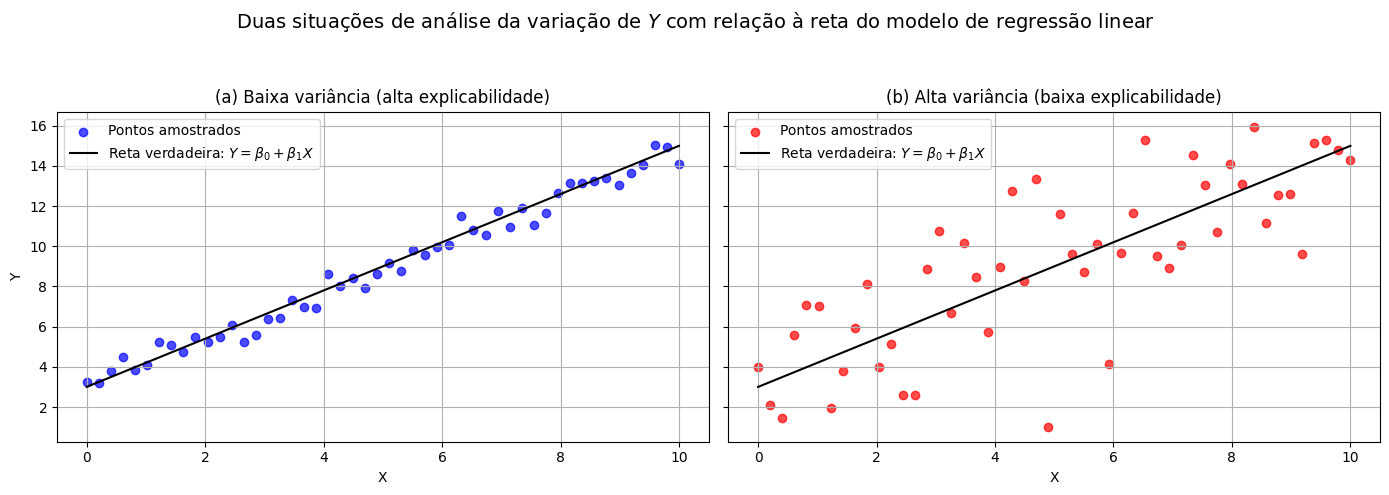

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Dados para Figura 3
np.random.seed(42)
n = 50
X = np.linspace(0, 10, n)
beta_0 = 3
beta_1 = 1.2

# Baixa variância
epsilon_low = np.random.normal(0, 0.5, n)
Y_low = beta_0 + beta_1 * X + epsilon_low

# Alta variância
epsilon_high = np.random.normal(0, 3, n)
Y_high = beta_0 + beta_1 * X + epsilon_high

# Reta verdadeira
Y_true = beta_0 + beta_1 * X

# Plotagem
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Subfigura (a) - Baixa variância
axs[0].scatter(X, Y_low, color='blue', alpha=0.7, label='Pontos amostrados')
axs[0].plot(X, Y_true, color='black', label=r'Reta verdadeira: $Y = \beta_0 + \beta_1 X$')
axs[0].set_title('(a) Baixa variância (alta explicabilidade)')
axs[0].set_xlabel('X')
axs[0].set_ylabel('Y')
axs[0].grid(True)
axs[0].legend()

# Subfigura (b) - Alta variância
axs[1].scatter(X, Y_high, color='red', alpha=0.7, label='Pontos amostrados')
axs[1].plot(X, Y_true, color='black', label=r'Reta verdadeira: $Y = \beta_0 + \beta_1 X$')
axs[1].set_title('(b) Alta variância (baixa explicabilidade)')
axs[1].set_xlabel('X')
axs[1].grid(True)
axs[1].legend()

plt.suptitle('Duas situações de análise da variação de $Y$ com relação à reta do modelo de regressão linear', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()



### 📏 Variação total, explicada e não explicada

A **Soma dos Quadrados dos Erros (SQE)** representa a porção da variabilidade de $Y$ **não explicada** pelo modelo:

$$
\text{SQE} = \sum_{i=1}^n (Y_i - \hat{Y}_i)^2
$$

A **Soma Total dos Quadrados (STQT)** representa a **variação total** de $Y$ em torno da sua própria média:

$$
\text{STQT} = \sum_{i=1}^n (Y_i - \bar{Y})^2
$$

Como a reta de regressão ajustada por mínimos quadrados minimiza os desvios, temos:

$$
\text{SQE} < \text{STQT}
$$

A **Soma dos Quadrados da Regressão (SQR)** é definida como a parte da variação de $Y$ que foi **explicada** pela regressão linear:

$$
\text{SQR} = \text{STQT} - \text{SQE}
$$

---

### 🎯 Definição do coeficiente de determinação

O **coeficiente de determinação** $R^2$ é a **proporção da variância de $Y$ explicada pelo modelo de regressão linear**:

$$
R^2 = 1 - \frac{\text{SQE}}{\text{STQT}} = \frac{\text{SQR}}{\text{STQT}} \in [0, 1]
$$

- Quando $R^2 \approx 1$, grande parte da variação de $Y$ é explicada pela regressão linear;
- Quando $R^2 \approx 0$, o modelo linear **não consegue explicar** a variabilidade de $Y$ com base em $X$.

Essa métrica é amplamente utilizada para avaliar a **qualidade do ajuste** da regressão.

In [ ]:
def analise_qualidade_regressao(X, Y, caso):
    n = len(X)
    sum_x = np.sum(X)
    sum_y = np.sum(Y)
    sum_x2 = np.sum(X**2)
    sum_xy = np.sum(X * Y)

    # Sistema normal: A * beta = b
    A = np.array([[n, sum_x], [sum_x, sum_x2]])
    b = np.array([sum_y, sum_xy])
    beta_0, beta_1 = np.linalg.solve(A, b)

    # Previsões
    Y_hat = beta_0 + beta_1 * X
    Y_bar = np.mean(Y)

    # SQE: Soma dos Quadrados dos Erros (não explicada)
    SQE = np.sum((Y - Y_hat)**2)

    # STQT: Soma Total dos Quadrados (total)
    STQT = np.sum((Y - Y_bar)**2)

    # SQR: Soma dos Quadrados da Regressão (explicada)
    SQR = STQT - SQE

    # R²
    R2 = SQR / STQT

    # Impressão dos resultados
    print(f"🔎 Análise do caso {caso}")
    print(f"  β̂₀ = {beta_0:.4f}, β̂₁ = {beta_1:.4f}")
    print(f"  SQE   = {SQE:.4f}")
    print(f"  STQT  = {STQT:.4f}")
    print(f"  SQR   = {SQR:.4f}")
    print(f"  R²    = {R2:.4f}")
    print("  Interpretação:", end=" ")

    if R2 > 0.8:
        print("O modelo explica muito bem a variação de Y.")
    elif R2 > 0.5:
        print("O modelo explica razoavelmente a variação de Y.")
    elif R2 > 0.2:
        print("O modelo tem pouca capacidade explicativa.")
    else:
        print("O modelo linear praticamente não explica a variação de Y.")
    print()


In [ ]:
analise_qualidade_regressao(X, Y_baixo, caso="(a) – Baixa variância")
analise_qualidade_regressao(X, Y_alto,  caso="(b) – Alta variância")


🔎 Análise do caso (a) – Baixa variância
  β̂₀ = 2.4232, β̂₁ = 1.4294
  SQE   = 13.6746
  STQT  = 899.7728
  SQR   = 886.0983
  R²    = 0.9848
  Interpretação: O modelo explica muito bem a variação de Y.

🔎 Análise do caso (b) – Alta variância
  β̂₀ = -16.3881, β̂₁ = 5.0520
  SQE   = 28360.0093
  STQT  = 39428.3934
  SQR   = 11068.3842
  R²    = 0.2807
  Interpretação: O modelo tem pouca capacidade explicativa.

